#### This guides trains a neural network model to classify images of clothing, like sneakers and shirts.

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#### Import the fashion_mnist dataset
* This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images contains individual articles of clothing at low resolution (28 by 28 pixels)

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [29]:
test_images.shape

(10000, 28, 28)

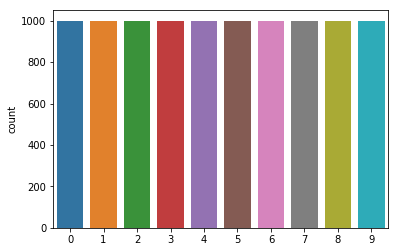

In [30]:
import seaborn as sns
sns.countplot(test_labels)

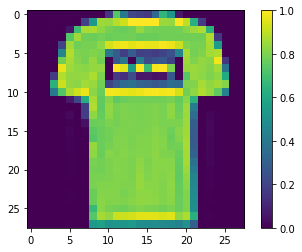

In [31]:
plt.figure()
plt.imshow(train_images[1])
plt.grid(False)
plt.colorbar()
plt.show()

`We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:`

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

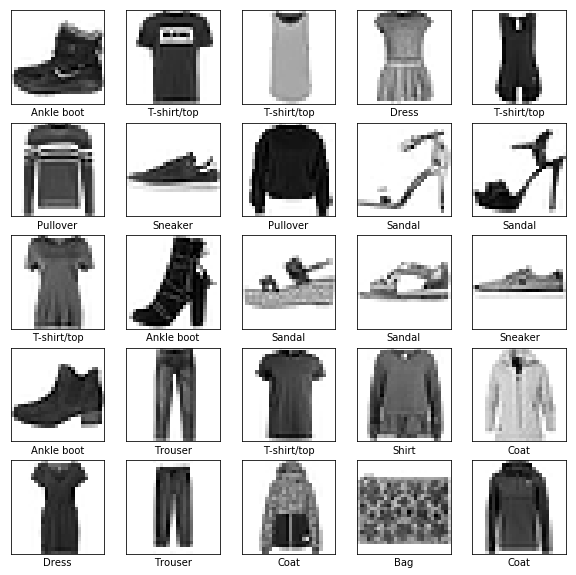

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#### Build the Model

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


`Catch`:
No need to one-hot encode the train/test_labels, if you are using the sparse_categorical_cross_entrpy loss function.

In [144]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [145]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 347us/step - loss: 0.7164 - acc: 0.7350 - val_loss: 0.5537 - val_acc: 0.7954
Epoch 2/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.4750 - acc: 0.8248 - val_loss: 0.5255 - val_acc: 0.8083
Epoch 3/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.4171 - acc: 0.8474 - val_loss: 0.4219 - val_acc: 0.8460
Epoch 4/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.3807 - acc: 0.8594 - val_loss: 0.4267 - val_acc: 0.8398
Epoch 5/20
60000/60000 [==============================] - 20s 340us/step - loss: 0.3595 - acc: 0.8673 - val_loss: 0.3781 - val_acc: 0.8613
Epoch 6/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.3406 - acc: 0.8743 - val_loss: 0.3835 - val_acc: 0.8594
Epoch 7/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.3255 - acc: 0.8800 - val_loss: 0.

In [146]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

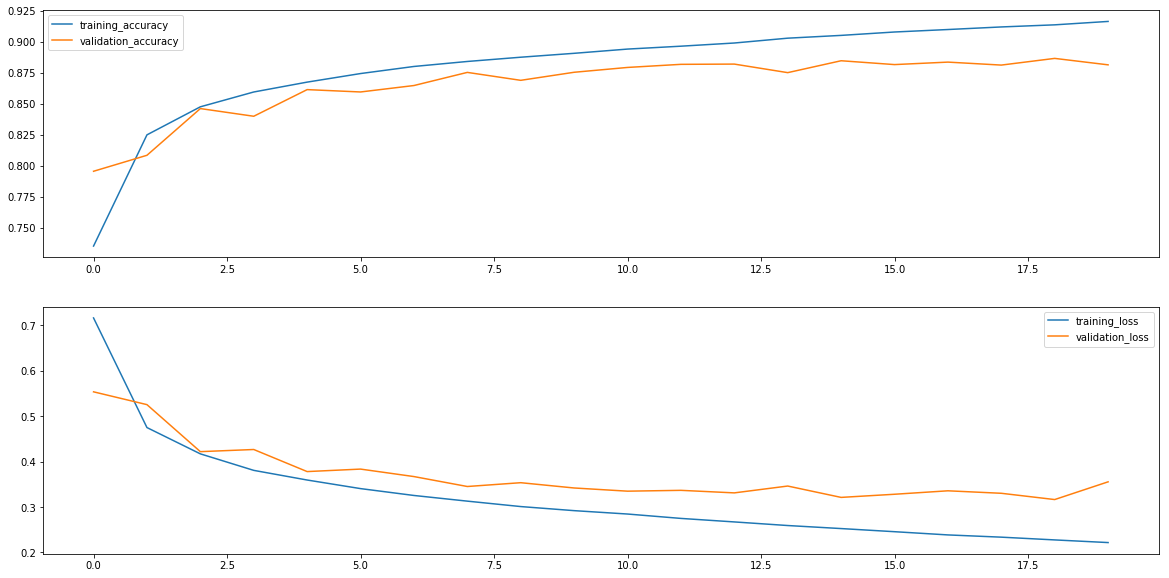

In [147]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
loss = history.history['loss']
acc = history.history['acc']

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(range(20),acc, label='training_accuracy')
plt.plot(range(20),val_acc, label='validation_accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(20),loss, label='training_loss')
plt.plot(range(20),val_loss, label='validation_loss')
plt.legend()
plt.show()

In [148]:
predictions = model.predict(test_images)

In [149]:
predictions[0]

array([1.4268779e-06, 3.1943318e-06, 5.0260627e-07, 3.5824339e-09,
       1.2704236e-06, 4.4757165e-03, 1.8119356e-06, 5.8029214e-04,
       4.4854840e-09, 9.9493575e-01], dtype=float32)

In [150]:
np.argmax(predictions[0])

9

In [151]:
test_labels[0]

9

In [152]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

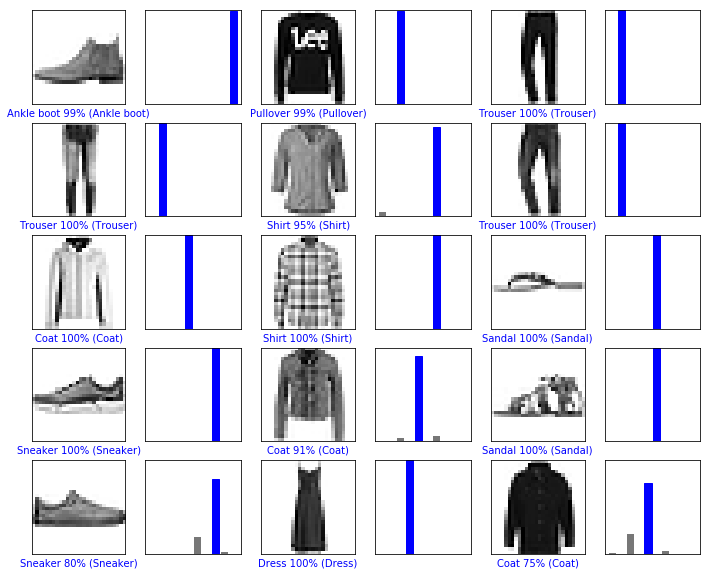

In [153]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()